# CMB Lensing maps

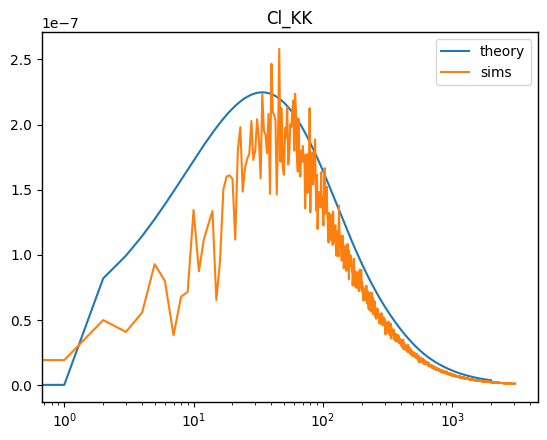

In [223]:
import numpy as np
from orphics import cosmology
import matplotlib.pyplot as plt
import healpy as hp

'''
Make some predictions for CMB lensing K

'''
ells = np.arange(2000)
cambRoot = '../data/cosmo2017_10K_acc3'
camb_obj = cosmology.loadTheorySpectraFromCAMB(cambRoot,unlensedEqualsLensed=False,useTotal=False,TCMB = 2.7255e6,lpad=9000,get_dimensionless=False)
cl_kk = camb_obj.gCl('kk', ells)

plt.plot(ells,cl_kk,label='theory')
plt.title('Cl_KK')
plt.xscale('log')


'''
Load into memory a simulated CMB lensing kappa map
I am not expecting a perfect match here, the cosmology is different, but as a order of magnitude comparison it should be fine

'''
cmb = np.load('../data/CMB_lensing_sim.npy',allow_pickle=True)
cmb_cl = hp.anafast(cmb)
plt.plot(cmb_cl,label = 'sims')
plt.legend()


# Note to myself: to install Tempura, I had to do module load PrgEnv-intel --

In [5]:
'''
Run CLASS ---
export PYTHONPATH="/global/homes/m/mgatti/Mass_Mapping/CMB_lensing/extra/tempura/:$PYTHONPATH"
'''

In [224]:
'''
Let's generate some TT,TE.. using CLASS (it will be useful in the long run).
I don't think it will matter for this test if these are all slightly different..

'''

import subprocess
import numpy as np
import matplotlib.pyplot as plt
from classy import Class
import numpy as np
save = np.load('save.npy',allow_pickle=True).item()


params = dict()
params['root']   = './'
params['output'] = 'dTk'
#params['nbody_gauge_transfer_functions'] = 'y'
params['P_k_max_h/Mpc']   = 100
        
#####LCDM parameter####
        
params['Omega_b']   = 0.049000
params['Omega_cdm'] = 0.268500
params['h']         = 0.671100
params['tau_reio']  = 0.054308
params['sigma8']    = 0.834000
params['n_s']       = 0.962400
params['Omega_fld'] = 0. #682500



#params['w0_fld']    = -1.
#params['Omega_Lambda']= 0.000



params['format']    = 'CAMB'

params['write primordial'] = 'yes'
params['write background'] = 'yes'
params['write parameters'] = 'yes'
params['write thermodynamics'] = 'yes'
params['write warnings'] = 'yes'
params['headers'] = 'yes'
        
#params['overwrite_root'] = 'y'
       
params['input_verbose'] = 1
params['background_verbose'] = 10
params['thermodynamics_verbose'] = 1
params['perturbations_verbose'] = 1
params['transfer_verbose'] = 1
params['primordial_verbose'] = 1
params['spectra_verbose'] = 1
params['nonlinear_verbose'] = 1
params['lensing_verbose'] = 1
params['output_verbose'] = 1
        
        
        
params['N_ur'] = 2.0328
params['N_ncdm'] = 1
params['deg_ncdm'] = 1
params['T_ncdm'] = 0.71611
        
        
########axion parameters#######
params['scf_potential'] = 'axion'
params['n_axion'] = 3.000000 #1

##one can pass either:
params['log10_axion_ac'] = -3.500000 #-3.531
params['fraction_axion_ac'] = 0.0001 #0.000100 #0.1

##one also needs to specify scf_param = phi_i, phi_ini_dot
params['scf_parameters'] = '2.7,0.' #1.5,0.0
########################

#####extra EDE parameters#####
#keep as is for standard runs#
##we do not use the fluid approximation##
params['scf_evolve_as_fluid'] = 'no' 	
#params['scf_evolve_as_fluid_always'] = 'no'
params['scf_evolve_like_axionCAMB'] = 'no'
params['do_shooting'] =  'yes'  ##controls overall shooting; useful when debugging
params['do_shooting_scf'] = 'yes' ##controls shooting for scf only; useful when debugging.
params['scf_has_perturbations'] = 'yes'
params['attractor_ic_scf'] ='no' 
params['compute_phase_shift'] = 'no' ##one can ask to compute the phase_shift imprinted by the EDE following Baumann et al. JCAP01(2016)007
params['loop_over_background_for_closure_relation']= 'yes' ##this is required because we do not necessarily know the value of Omega_EDE today and therefore the closure relation needs to be enforced otherwise. for the usual n=3 EDE this is not really relevant, but it may be for n=1.

####################################

#####precision parameters#####
#keep as is for standard runs#
params['adptative_stepsize'] = 1000
params['precision_newton_method_F'] = 1e-3   ####be careful when playing with these parameters if theta_s is shoot for (we recommend running on H for MCMC); but often required to be set to 1e-2 or 1e-3 for EDE shooting to converged.
params['precision_newton_method_x'] = 1e-3  ####be careful when playing with these parameters if theta_s is shoot for (we recommend running on H for MCMC); but often required to be set to 1e-2 or 1e-3 for EDE shooting to converged.
params['precision_loop_over_background'] = 1e-3 ### precision with which we will be enforcing the closure relation



###################################
params['z_max_pk'] = '100.'
params['lensing']= 'yes' 
params['output']= 'tCl,pCl,lCl,mPk'         
    
   
    
cosmo = Class()
cosmo.set(params)  # Replace with the actual path
cosmo.compute()

lensing_cls = cosmo.lensed_cl(2500) 
unlensed_cls = cosmo.raw_cl(2500) 

otal matter (computed till k = 106.737 h/Mpc)
 -> S8=0.85726 for total matter (computed till k = 106.737 h/Mpc) with Omega_m = 0.3175 
 -> sigma8=0.833333 for baryons+cdm  (computed till k = 106.737 h/Mpc)
 -> sigma_12 = 8.294843e-01 for total matter 
No non-linear spectra requested. Nonlinear calculations skipped.
Computing transfers
Computing unlensed harmonic spectra
Computing lensed spectra (fast mode)
Reading input parameters
Computing unknown input parameters
 -> matched budget equations by adjusting Omega_Lambda = 6.824071e-01
 -> matched budget equations by adjusting Omega_Lambda = 6.824071e-01
 -> matched budget equations by adjusting Omega_Lambda = 6.824071e-01
 -> matched budget equations by adjusting Omega_Lambda = 6.824071e-01
 -> matched budget equations by adjusting Omega_Lambda = 6.824071e-01
 -> matched budget equations by adjusting Omega_Lambda = 6.824071e-01
 -> found alpha_squared = -4.514942e+00
 -> found power_of_mu = -3.591077e+00
 -> found A_s = 2.131800e-09
 ->

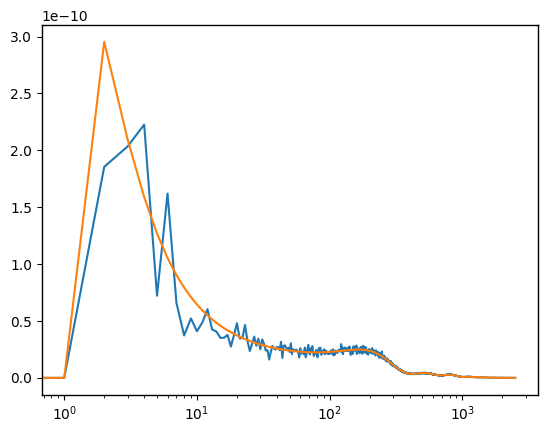

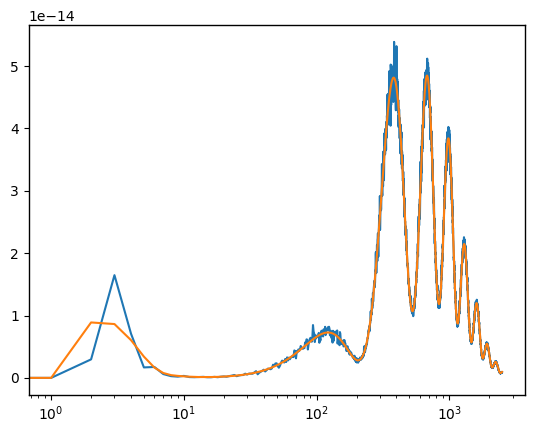

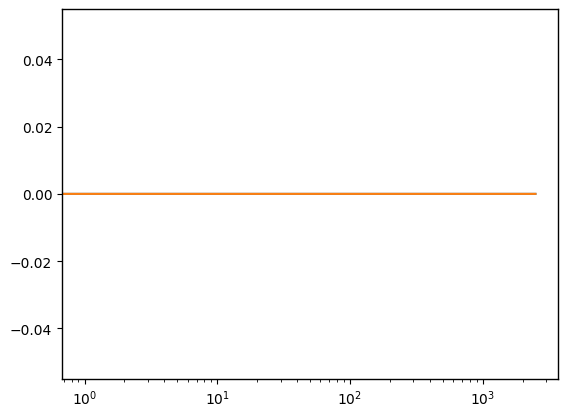

In [225]:

'''
Let's make some correlated maps from unlensed Cls

'''
import pixell
from pixell import curvedsky


def rand_alm_(ps, ainfo=None, lmax=None, seed=None, dtype=np.complex128, m_major=True, return_ainfo=False):

    rtype      = np.zeros([0],dtype=dtype).real.dtype
    wps, ainfo = curvedsky.prepare_ps(ps, ainfo=ainfo, lmax=lmax)

    alm = curvedsky.rand_alm_white(ainfo, pre=[wps.shape[0]], seed=seed, dtype=dtype, m_major=m_major)
    ps12 = curvedsky.enmap.multi_pow(wps, 0.5)
    ainfo.lmul(alm, (ps12/2**0.5).astype(rtype, copy=False), alm)
    alm[:,:ainfo.lmax+1].imag  = 0
    alm[:,:ainfo.lmax+1].real *= 2**0.5
    if ps.ndim == 1: alm = alm[0]
    if return_ainfo: return alm, ainfo
    else: return alm

# generate TT EE EB BB from unlensed alms
ps = np.array([[unlensed_cls['tt'],unlensed_cls['te'],0*unlensed_cls['te']],
               [unlensed_cls['te'],unlensed_cls['ee'],0*unlensed_cls['te']],
               [0*unlensed_cls['tt'],0*unlensed_cls['te'],0*unlensed_cls['bb']]])


xx = 2500
nside = 1024

alms_ = curvedsky.rand_alm(ps, ainfo=None, lmax=xx, seed=None, dtype=np.complex128, m_major=True, return_ainfo=False)

## let's make healpy maps
T_map = hp.alm2map(alms_[0],nside = nside)
E_map = hp.alm2map(alms_[1],nside = nside)
B_map = hp.alm2map(alms_[2],nside = nside)

T_cl = hp.anafast(T_map)
E_cl = hp.anafast(E_map)
B_cl = hp.anafast(B_map)


ell = np.arange(len(T_cl))
plt.plot(T_cl[:xx]*ell[:xx])
plt.plot(unlensing_cls['tt'][:xx]*ell[:xx])
plt.xscale('log')
plt.show()
plt.plot(E_cl[:xx]*ell[:xx])
plt.plot(unlensing_cls['ee'][:xx]*ell[:xx])
plt.xscale('log')
plt.show()
plt.plot(B_cl[:xx]*ell[:xx])
plt.plot(unlensing_cls['bb'][:xx]*ell[:xx])
plt.xscale('log')
plt.show()





In [197]:

'''
Let's lens the maps

'''
import sys
sys.path.append('/global/homes/m/mgatti/Mass_Mapping/CMB_lensing/extra/tempura/')
import pytempura
import falafel

from pixell import enmap,lensing as plensing,curvedsky, utils, enplot
import copy
from pixell import reproject
res = 3.0 # resolution in arcminutes
shape,wcs = enmap.fullsky_geometry(res=np.deg2rad(res/60.),proj="car")


kappa_cmb = np.load('../data/CMB_lensing_sim.npy',allow_pickle=True)
kappa_cmb_alm = hp.map2alm(kappa_cmb,lmax = xx)
ell, emm = hp.Alm.getlm(lmax=xx)

phi_cmb_alm = kappa_cmb_alm/(ell*(ell+1)/2)




maps_ = pixell.lensing.lens_map_curved((3,shape[0],shape[1]), wcs, phi_cmb_alm, alms_, phi_ainfo=None, maplmax=None, dtype=np.float64, spin=[0,2], output="l", geodesic=True, verbose=False, delta_theta=None)
alm_TEB = pixell.curvedsky.map2alm(maps_[0], lmax=lmax, spin=[0, 2])

cl_T_lensed_hp = hp.alm2cl(alm_TEB[0])
cl_E_lensed_hp = hp.alm2cl(alm_TEB[1])
cl_B_lensed_hp = hp.alm2cl(alm_TEB[2])

map_T_lensed_hp,map_E_lensed_hp,map_B_lensed_hp = hp.alm2map(alm_TEB,nside=nside,pol=False)




/tmp/ipykernel_407436/592305899.py:12: RuntimeWarning: divide by zero encountered in divide
  phi_cmb_alm = kappa_cmb_alm/(ell*(ell+1)/2)
/tmp/ipykernel_407436/592305899.py:12: RuntimeWarning: invalid value encountered in divide
  phi_cmb_alm = kappa_cmb_alm/(ell*(ell+1)/2)


'\nfrom pixell import reproject\nhmap = reproject.healpix_from_enmap(map_[0], nside=512,lmax = 1500)\nhp.mollview(hmap)\nplt.show()\nhp.mollview(hmap-T_map)\n'

/tmp/ipykernel_407436/2682643419.py:2: RuntimeWarning: divide by zero encountered in divide
  plt.plot(T_cl[:xx]/unlensing_cls['tt'][:xx])
/tmp/ipykernel_407436/2682643419.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(cl_T_lensed_hp[:xx]/unlensing_cls['tt'][:xx])
/tmp/ipykernel_407436/2682643419.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(lensing_cls['tt'][:xx]/unlensing_cls['tt'][:xx])
/tmp/ipykernel_407436/2682643419.py:5: RuntimeWarning: invalid value encountered in divide
  plt.plot(unlensing_cls['tt'][:xx]/unlensing_cls['tt'][:xx])


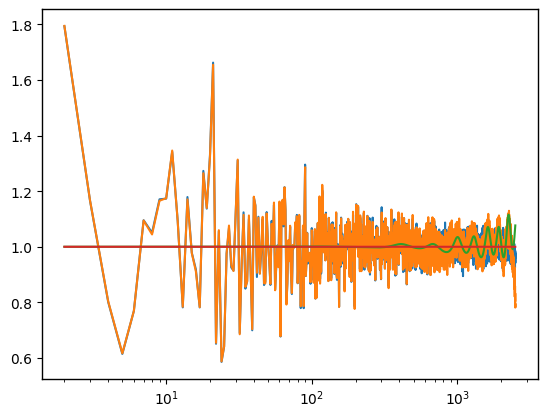

/tmp/ipykernel_407436/2682643419.py:9: RuntimeWarning: divide by zero encountered in divide
  plt.plot(E_cl[:xx]/unlensing_cls['ee'][:xx])
/tmp/ipykernel_407436/2682643419.py:10: RuntimeWarning: invalid value encountered in divide
  plt.plot(cl_E_lensed_hp[:xx]/unlensing_cls['ee'][:xx])
/tmp/ipykernel_407436/2682643419.py:11: RuntimeWarning: invalid value encountered in divide
  plt.plot(lensing_cls['ee'][:xx]/unlensing_cls['ee'][:xx])
/tmp/ipykernel_407436/2682643419.py:12: RuntimeWarning: invalid value encountered in divide
  plt.plot(unlensing_cls['ee'][:xx]/unlensing_cls['ee'][:xx])


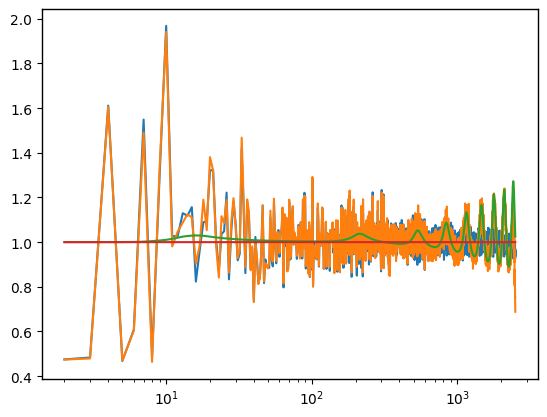

/tmp/ipykernel_407436/2682643419.py:17: RuntimeWarning: invalid value encountered in divide
  plt.plot(cl_B_lensed_hp[:xx]/lensing_cls['bb'][:xx])


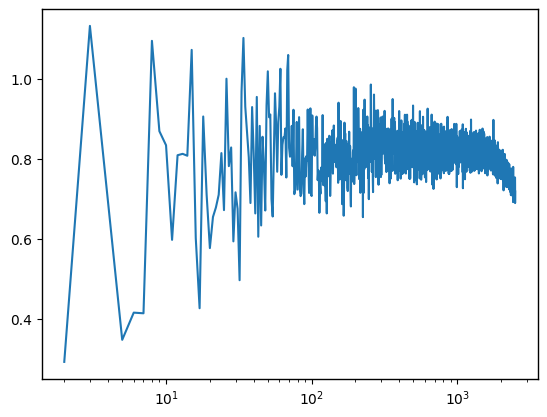

In [200]:
ell = np.arange(len(T_cl))
plt.plot(T_cl[:xx]/unlensing_cls['tt'][:xx])
plt.plot(cl_T_lensed_hp[:xx]/unlensing_cls['tt'][:xx])
plt.plot(lensing_cls['tt'][:xx]/unlensing_cls['tt'][:xx])
plt.plot(unlensing_cls['tt'][:xx]/unlensing_cls['tt'][:xx])
plt.xscale('log')
plt.show()
ell = np.arange(len(T_cl))
plt.plot(E_cl[:xx]/unlensing_cls['ee'][:xx])
plt.plot(cl_E_lensed_hp[:xx]/unlensing_cls['ee'][:xx])
plt.plot(lensing_cls['ee'][:xx]/unlensing_cls['ee'][:xx])
plt.plot(unlensing_cls['ee'][:xx]/unlensing_cls['ee'][:xx])
plt.xscale('log')
plt.show()
ell = np.arange(len(T_cl))
#plt.plot(B_cl[:xx]/unlensing_cls['bb'][:xx])
plt.plot(cl_B_lensed_hp[:xx]/lensing_cls['bb'][:xx])
plt.xscale('log')



# CMB map making

In [204]:
from __future__ import print_function
from orphics import maps,io,cosmology,stats
from pixell import enmap,lensing as plensing,curvedsky, utils, enplot
#from enlib import bench
import numpy as np
import os,sys
import healpy as hp
from falafel import qe#,utils
import pytempura

ests = ['mv']
px = qe.pixelization(shape,wcs)

sindex = 1

# Maximum multipole for alms
mlmax = lmax+500

# Filtering configuration
lmax = xx
lmin = 10.
beam_fwhm = 1.
noise_t = 0.


import falafel


ls = np.arange(mlmax)
noise_t = np.zeros(mlmax)
noise_p = np.sqrt(2.)*noise_t
nells = {}

nells['TT'] = (noise_t*np.pi/180./60.)**2. / maps.gauss_beam(beam_fwhm,ls)**2.
nells['EE'] = (noise_p*np.pi/180./60.)**2. / maps.gauss_beam(beam_fwhm,ls)**2.
nells['BB'] = (noise_p*np.pi/180./60.)**2. / maps.gauss_beam(beam_fwhm,ls)**2.

#alm_TEB = hp.map2alm([map_T_lensed_hp,map_E_lensed_hp,map_B_lensed_hp],lmax = lmax)
#alm_TEB_unlensed = hp.map2alm([T_map,E_map,B_map],lmax = lmax)


In [205]:
1

1

In [213]:
from orphics import maps,io,cosmology,stats
'''
Run CLASS ---
export PYTHONPATH="/global/homes/m/mgatti/Mass_Mapping/CMB_lensing/extra/tempura/:$PYTHONPATH"
'''

import numpy as np
import sys
sys.path.append('/global/homes/m/mgatti/Mass_Mapping/CMB_lensing/extra/tempura/')
import pytempura
import falafel

#lmax = 2500
#lmin = 10
#mlmax = 3000

thloc = '/global/homes/m/mgatti/Mass_Mapping/CMB_lensing/extra/falafel/data/cosmo2017_10K_acc3'
ls = np.arange(lmax+1)
ucls = {}
tcls = {}
grad = True
theory = cosmology.loadTheorySpectraFromCAMB(thloc,get_dimensionless=False)
ells,gt,ge,gb,gte = np.loadtxt(f"{thloc}_camb_1.0.12_grads.dat",unpack=True,usecols=[0,1,2,3,4])
#if nells is None: nells = {'TT':0,'EE':0,'BB':0}
ucls['TT'] = maps.interp(ells,gt)(ls) if grad else theory.lCl('TT',ls)
ucls['TE'] = maps.interp(ells,gte)(ls) if grad else theory.lCl('TE',ls)
ucls['EE'] = maps.interp(ells,ge)(ls) if grad else theory.lCl('EE',ls)
ucls['BB'] = maps.interp(ells,gb)(ls) if grad else theory.lCl('BB',ls)
ucls['kk'] = theory.gCl('kk',ls)
tcls['TT'] = theory.lCl('TT',ls) #+ nells['TT']
tcls['TE'] = theory.lCl('TE',ls)
tcls['EE'] = theory.lCl('EE',ls) #+ nells['EE']
tcls['BB'] = theory.lCl('BB',ls) #+ nells['BB']



# Get normalizations
ests = ['mv']
Als = pytempura.get_norms(ests,ucls,tcls,lmin,lmax,k_ellmax=mlmax,no_corr=True)
Als



/global/homes/m/mgatti/Mass_Mapping/CMB_lensing/extra/tempura/pytempura/norm.py:96: RuntimeWarning: divide by zero encountered in divide
  r_mv[0,1:] = 1./ sum([1./x[0,1:] for x in [r_tt,r_te,r_ee,r_eb,r_tb]])


{'mv': array([[0.00000000e+00, 0.00000000e+00, 6.43072822e-10, ...,
         1.94458312e-21, 1.94242037e-21, 1.94027249e-21],
        [0.00000000e+00, 0.00000000e+00, 2.14021684e-10, ...,
         4.83678548e-21, 4.83798709e-21, 4.83921199e-21]])}

In [219]:


def isotropic_filter(alm,tcls,lmin,lmax,ignore_te=True):
    # Filter isotropically
    tcltt = tcls['TT']
    tclee = tcls['EE']
    tclte = tcls['TE']
    tclbb = tcls['BB']
    if ignore_te:
        filt_T = tcltt*0
        filt_E = tclee*0
        filt_B = tclbb*0
        ells = np.arange(tcltt.size)
        with np.errstate(divide='ignore', invalid='ignore'):
            filt_T[2:] = 1./tcltt[2:]
            filt_E[2:] = 1./tclee[2:]
            filt_B[2:] = 1./tclbb[2:]
        talm = qe.filter_alms(alm[0],filt_T,lmin=lmin,lmax=lmax)
        ealm = qe.filter_alms(alm[1],filt_E,lmin=lmin,lmax=lmax)
        balm = qe.filter_alms(alm[2],filt_B,lmin=lmin,lmax=lmax)
    else:
        filt_T_T = tcltt*0
        filt_E_T = tclee*0
        filt_T_E = tcltt*0
        filt_E_E = tclee*0
        filt_B = tclbb*0
        with np.errstate(divide='ignore', invalid='ignore'):
            filt_T_T[2:] = tclee[2:]/(tcltt[2:]*tclee[2:] - tclte[2:]**2.)
            filt_T_E[2:] = -tclte[2:]/(tcltt[2:]*tclee[2:] - tclte[2:]**2.)
            filt_E_T[2:] = -tclte[2:]/(tcltt[2:]*tclee[2:] - tclte[2:]**2.)
            filt_E_E[2:] = tcltt[2:]/(tcltt[2:]*tclee[2:] - tclte[2:]**2.)
            filt_B[2:] = 1./tclbb[2:]
        talm = qe.filter_alms(alm[0],filt_T_T,lmin=lmin,lmax=lmax) + qe.filter_alms(alm[1],filt_T_E,lmin=lmin,lmax=lmax)
        ealm = qe.filter_alms(alm[0],filt_E_T,lmin=lmin,lmax=lmax) + qe.filter_alms(alm[1],filt_E_E,lmin=lmin,lmax=lmax)
        balm = qe.filter_alms(alm[2],filt_B,lmin=lmin,lmax=lmax)
        
    return [talm,ealm,balm]


Xdat =  isotropic_filter(alm_TEB,tcls,lmin,lmax)
Xdat_unlensed =  isotropic_filter(alm_TEB_unlensed,tcls,lmin,lmax)

## Reconstruct
#recon = qe.qe_all(px,ucls,mlmax,
#                  fTalm=Xdat[0],fEalm=Xdat[1],fBalm=Xdat[2],
#                  estimators=ests,
#                  xfTalm=Xdat[0],xfEalm=Xdat[1],xfBalm=Xdat[2])
#    




from pixell import curvedsky as cs, enmap

def qe_spin_temperature_deflection(px,Xalm,Yalm,mlmax):
    """
    px is a pixelization object, initialized like this:
    px = pixelization(shape=shape,wcs=wcs) # for CAR
    px = pixelization(nside=nside) # for healpix
    """
    grad = gradient_spin(px,np.stack((Xalm,Xalm)),mlmax,spin=0)
    ymap = alm2map_(px,Yalm,spin=0,ncomp=1,mlmax=mlmax)[0]
    prod = -grad*ymap
    return prod


def qe_all(px,response_cls_dict,mlmax,
           fTalm=None,fEalm=None,fBalm=None,
           estimators=['TT','TE','EE','EB','TB','mv','mvpol'],
           xfTalm=None,xfEalm=None,xfBalm=None):
    """
    Returns reconstructed unnormalized estimators.

    Inputs are Cinv filtered alms.
    px is a pixelization object, initialized like this:
    px = pixelization(shape=shape,wcs=wcs) # for CAR
    px = pixelization(nside=nside) # for healpix
    """
    ests = estimators
    kfunc = lambda x: deflection_map_to_phi_curl_alms(px,x,mlmax)

    if xfTalm is None:
        if fTalm is not None: xfTalm = fTalm.copy()
    if xfEalm is None:
        if fEalm is not None: xfEalm = fEalm.copy()
    if xfBalm is None:
        if fBalm is not None: xfBalm = fBalm.copy()

    results = {}
    dcache = {}
    acache = {}

    def mixing(list_spec,list_alms):
        """wiener filter and combine together the alms in list_spec"""
        res = 0
        for spec,alm in zip(list_spec,list_alms):
            res = res + filter_alms(alm,response_cls_dict[spec])
        return res

    def xalm(name):
        try: return acache[name]
        except:
            if name=='t':
                acache[name] = mixing(['TT','TE'],[xfTalm,xfEalm])
            elif name=='t_e0':
                acache[name] = mixing(['TE'],[xfEalm])
            elif name=='t0':
                acache[name] = mixing(['TT'],[xfTalm])
            elif name=='e':
                acache[name] = mixing(['EE','TE'],[xfEalm,xfTalm])
            elif name=='e_t0':
                acache[name] = mixing(['TE'],[xfTalm])
            elif name=='e0':
                acache[name] = mixing(['EE'],[xfEalm])
            elif name=='b':
                acache[name] = mixing(['BB'],[xfBalm])
            return acache[name]

    test = lambda x: qe_spin_temperature_deflection(px,x,fTalm,mlmax)
    pest = lambda u,v,w,x: qe_spin_pol_deflection(px,u,v,w,x,mlmax)
    try: zero = fTalm*0
    except: zero = fEalm*0

    def dmap(name):
        try: return dcache[name]
        except:
            if name=='Tte' : dcache[name] = test(xalm("t"))
            if name=='Tte0' : dcache[name] = test(xalm("t_e0"))
            if name=='Tt'  : dcache[name] = test(xalm("t0"))
            if name=='Pte' : dcache[name] = pest(xalm("e"),zero,fEalm,zero)
            if name=='Pe'  : dcache[name] = pest(xalm("e0"),zero,fEalm,zero)
            if name=='Peb' : dcache[name] = pest(xalm("e0"),zero,fEalm,fBalm) # note xalm("b") always set to zero
            if name=='Ptb' : dcache[name] = pest(xalm("e_t0"),zero,zero,fBalm) # otherwise TB ends up wrong
            if name=='Pte0': dcache[name] = pest(xalm("e_t0"),zero,fEalm,zero) # Another weird one for TE
            if name=='Peb0': dcache[name] = pest(xalm("e0"),zero,zero,fBalm) # Another weird one for EB
            if name=='Pteb': dcache[name] = pest(xalm("e"),zero,fEalm,fBalm)

            return dcache[name]

    """
    Functions:
    test(gT,gE | E)
    polest(gT,gE | E,B)


    TT: test(gT,gE=0 | T)
    EE: polest(gT=0,gE | E,B=0)
    EB: polest(gT=0,gE | E=0,B)
    TE: polest(gE=0,gT | E,B=0) + test(gT=0,gE | T)
    TB: polest(gT,gE=0 | E=0,B) # this one's a bit weird
    mvpol: polest(gT=0,gE | E,B)
    mv: polest(gT,gE | E,B) + test(gT,gE | T)

    """

    if 'TE' in ests: results['TE'] = kfunc(dmap('Tte0') + dmap('Pte0'))
    if 'EB' in ests: results['EB'] = kfunc(dmap('Peb0'))
    if 'EE' in ests: results['EE'] = kfunc(dmap('Pe'))
    if 'TT' in ests: results['TT'] = kfunc(dmap('Tt'))
    if 'TB' in ests: results['TB'] = kfunc(dmap('Ptb'))
    if ('mvpol' in ests) or ('MVPOL' in ests): 
        r_mvpol = kfunc(dmap('Peb'))
    if ('mvpol' in ests): results['mvpol'] = r_mvpol
    if ('MVPOL' in ests): results['MVPOL'] = r_mvpol
    if ('MV' in ests) or ('mv' in ests):
        r_mv = kfunc(dmap('Pteb')+dmap('Tte'))
    if 'mv' in ests: results['mv'] = r_mv
    if 'MV' in ests: results['MV'] = r_mv
    return results

    
    
def filter_alms(alms,filt,lmin=None,lmax=None):
    """
    Filter the alms with transfer function specified
    by filt (indexed starting at ell=0).
    """
    mlmax = get_mlmax(alms)
    ls = np.arange(filt.size)
    if lmax is not None:
        assert lmax<=ls.max()
        assert lmax<=mlmax
    if lmin is not None: filt[ls<lmin] = 0
    if lmax is not None: filt[ls>lmax] = 0
    return cs.almxfl(alms.copy(),filt)

def get_mlmax(alms):
    if alms.ndim==2:
        asize = alms[0].size
    elif alms.ndim==1:
        asize = alms.size
    else:
        print(alms.shape)
        raise ValueError
    return hp.Alm.getlmax(asize)

def qe_spin_temperature_deflection(px,Xalm,Yalm,mlmax):
    """
    px is a pixelization object, initialized like this:
    px = pixelization(shape=shape,wcs=wcs) # for CAR
    px = pixelization(nside=nside) # for healpix
    """
    grad = gradient_spin(px,np.stack((Xalm,Xalm)),mlmax,spin=0)

    def alm2map(self,alm,spin,ncomp,mlmax):
        if self.hpix:
            if spin!=0: 
                res = hp.alm2map_spin(alm,nside=self.nside,spin=spin,lmax=mlmax)
                return res
            else: 
                # complex64 not supported here
                return hp.alm2map(alm.astype(np.complex128),nside=self.nside,pol=False)[None]
        else:
            omap = enmap.empty((ncomp,)+self.shape,self.wcs,dtype=self.dtype)[0]
            return cs.alm2map(alm,omap,spin=spin)
  

    ymap = alm2map(px,Yalm,spin=0,ncomp=1,mlmax=mlmax)[0]
    prod = -grad*ymap
    return prod

def qe_spin_pol_deflection(px,X_Ealm,X_Balm,Y_Ealm,Y_Balm,mlmax):
    """
    px is a pixelization object, initialized like this:
    px = pixelization(shape=shape,wcs=wcs) # for CAR
    px = pixelization(nside=nside) # for healpix
    """

    palms = pol_alms(X_Ealm,X_Balm)
    # palms is now (Ealm + i Balm, Ealm - i Balm)
    # corresponding to +2 and -2 spin components
    grad_p2 = gradient_spin(px,palms,mlmax,spin=2)
    grad_m2 = gradient_spin(px,palms,mlmax,spin=-2)
    # E_alm, B_alm -> Q(n), U(n) -> Q+iU, Q-iU
    ymap = rot2d(px.alm2map(np.stack((Y_Ealm,Y_Balm)),spin=2,ncomp=2,mlmax=mlmax))
    prod = -grad_m2*ymap[0]-grad_p2*ymap[1]
    if not(px.hpix):
        prod = enmap.enmap(prod,px.wcs)
    return prod/2
def gradient_spin(px,alm,mlmax,spin):
    """
    Given appropriately Wiener filtered temperature map alms,
    returns a real-space map containing the gradient.

    alm should be (alm_+|s|, alm_-|s|)

    px is a pixelization object, initialized like this:
    px = pixelization(shape=shape,wcs=wcs) # for CAR
    px = pixelization(nside=nside) # for healpix
    """

    ells = np.arange(0,mlmax)
    if spin==0:
        fl = np.sqrt(ells*(ells+1.))
        spin_out = 1 ; comp = 0
        sign = 1
    elif spin==(-2):
        fl = ells * 0
        fl[ells>=1] = np.sqrt((ells[ells>=1]-1)*(ells[ells>=1]+2.))
        spin_out = -1 ; comp = 1
        sign = 1
    elif spin==2:
        fl = ells * 0
        fl[ells>=2] = np.sqrt((ells[ells>=2]-2)*(ells[ells>=2]+3.))
        spin_out = 3 ; comp = 0
        sign = -1
    fl[ells<2] = 0
    salms = almxfl(alm,fl)
    return sign*px.alm2map_spin(salms,spin,spin_out,ncomp=2,mlmax=mlmax)[comp]


def pol_alms(Ealm,Balm): 
    return np.stack((Ealm+1j*Balm,Ealm-1j*Balm))
def almxfl(alm,fl):
    alm = np.asarray(alm)
    ncomp = alm.shape[0]
    assert ncomp in [1,2,3]
    res = cs.almxfl(alm,fl)
    return res
def rot2d(fmap):
    """
    If fmap is an [2,...] ndarray with f0=fmap[0],f1=fmap[1],
    returns [( f0 + i f1 ) , ( f0 - i f1)]
    e.g. Rotates the map outputs M+ and M- of alm2map into sM and -sM
    """
    return np.stack((fmap[0]+fmap[1]*1j,fmap[0]-fmap[1]*1j))

def irot2d(fmap,spin):
    """
    If fmap is an [2,...] ndarray with f0=fmap[0],f1=fmap[1],
    returns [( f0 + (-1)^s f1 )/2 , ( f0 - (-1)^s f1 )/(2i)]
    e.g. Rotates the alms +sAlm and -sAlm into inputs a+ and a- for map2alm
    """
    return -np.stack(((fmap[0]+((-1)**spin)*fmap[1])/2.,(fmap[0]-((-1)**spin)*fmap[1])/2./1j))

def rot2dalm(fmap,spin):
    #inverse operation of irot2d
    ps=(fmap[0]+1j*fmap[1])
    ms=(-1)**spin*(fmap[0]-1j*fmap[1])
    return -np.stack((ps,ms))


def deflection_map_to_phi_curl_alms(px,dmap,mlmax):
    """
    px is a pixelization object, initialized like this:
    px = pixelization(shape=shape,wcs=wcs) # for CAR
    px = pixelization(nside=nside) # for healpix
    """

    res = px.map2alm_spin(dmap,lmax=mlmax,spin_alm=0,spin_transform=1)
    ells = np.arange(0,mlmax)
    fl = np.sqrt(ells*(ells+1.))
    res = almxfl(res,fl)
    return res


econ = qe_all(px,ucls,mlmax,
                  fTalm=Xdat[0],fEalm=Xdat[1],fBalm=Xdat[2],
                  estimators=ests,
                  xfTalm=Xdat[0],xfEalm=Xdat[1],xfBalm=Xdat[2])


['mv']


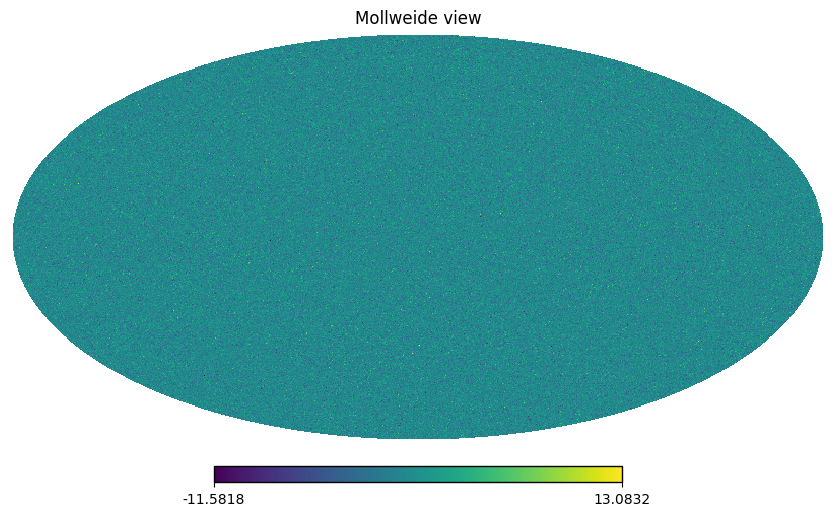

In [222]:
map_rec = hp.alm2map(econ['mv'][0].astype(np.complex128),nside=1024)
hp.mollview(map_rec)

In [217]:
#hp.mollview(map_E_lensed_hp-E_map)
#hp.mollview(T_map)

[2.00000000e+00 3.37204729e+00 5.68535147e+00 9.58563703e+00
 1.61616107e+01 2.72488578e+01 4.59422186e+01 7.74596669e+01
 1.30598830e+02 2.20192716e+02 3.71250126e+02 6.25936491e+02
 1.05534372e+03 1.77933447e+03 3.00000000e+03]
(2501,)


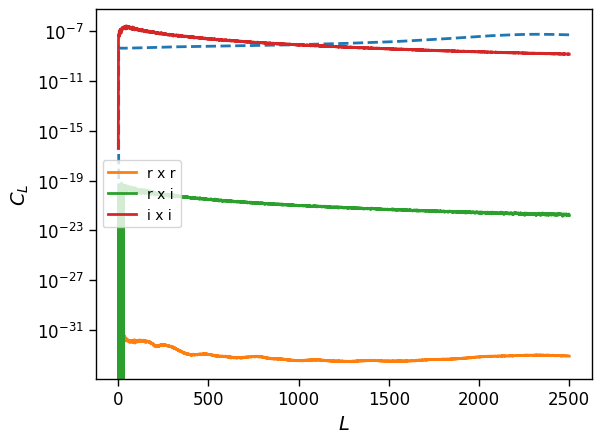

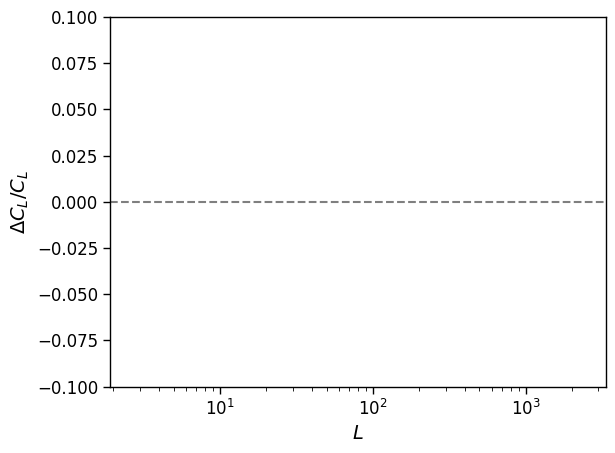

In [218]:
# Get input kappa alms

def change_alm_lmax(alms, lmax, dtype=np.complex128):
    ilmax  = hp.Alm.getlmax(alms.shape[-1])
    olmax  = lmax
    oshape     = list(alms.shape)
    oshape[-1] = hp.Alm.getsize(olmax)
    oshape     = tuple(oshape)
    alms_out   = np.zeros(oshape, dtype = dtype)
    flmax      = min(ilmax, olmax)
    for m in range(flmax+1):
        lminc = m
        lmaxc = flmax
        idx_isidx = hp.Alm.getidx(ilmax, lminc, m)
        idx_ieidx = hp.Alm.getidx(ilmax, lmaxc, m)
        idx_osidx = hp.Alm.getidx(olmax, lminc, m)
        idx_oeidx = hp.Alm.getidx(olmax, lmaxc, m)
        alms_out[..., idx_osidx:idx_oeidx+1] = alms[..., idx_isidx:idx_ieidx+1].copy()
    return alms_out


ikalm = copy.deepcopy(kappa_cmb_alm)


# Cross-correlate and plot
kalms = {}
icls = hp.alm2cl(ikalm,ikalm)
ells = np.arange(len(icls))
bin_edges = np.geomspace(2,mlmax,15)
print(bin_edges)
binner = stats.bin1D(bin_edges)
bin = lambda x: binner.bin(ells,x)
print(ells.shape)
for est in ests:
    pl = io.Plotter('CL')
    
    kalms[est] = plensing.phi_to_kappa(hp.almxfl(econ[est][0].astype(np.complex128),Als[est][0] )) # ignore curl
    kalms[est] =  change_alm_lmax(kalms[est], lmax, dtype=np.complex128)
    
    
    pl.add(ells,(ells*(ells+1.)/2.)**2. * Als[est][0][:2501],ls='--')
    cls = hp.alm2cl(kalms[est],ikalm)
    acls = hp.alm2cl(kalms[est],kalms[est])
    pl.add(ells,acls,label='r x r')
    pl.add(ells,cls,label = 'r x i')
    pl.add(ells,icls, label = 'i x i')
    #plt.plot(hp.alm2cl(econ['mv'][0].astype(np.complex128)))
    #plt.plot(ucls['kk'])
    plt.legend()
    
    plt.show()
    pl2 = io.Plotter('rCL',xyscale='loglin')
    pl2.add(*bin((cls-icls)/icls),marker='o')
    pl2.hline(y=0)
    pl2._ax.set_ylim(-0.1,0.1)
   # pl2.done(f'simple_recon_diff_{est}.png')
    
    pl._ax.set_ylim(1e-9,1e-5)
    plt.show()
   # pl.done(f'simple_recon_{est}.png')
